## Exploration of sample chess game data from the lichess site.

##### URL: https://www.kaggle.com/datasets/datasnaek/chess

In [53]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [54]:
pwd = os.getcwd()
games = pwd + "/games.csv"

In [55]:
games = pd.read_csv(games)
games.drop(columns=[ "last_move_at", 'created_at', 'white_id', 'black_id', 'moves'], inplace=True)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              20058 non-null  object
 1   rated           20058 non-null  bool  
 2   turns           20058 non-null  int64 
 3   victory_status  20058 non-null  object
 4   winner          20058 non-null  object
 5   increment_code  20058 non-null  object
 6   white_rating    20058 non-null  int64 
 7   black_rating    20058 non-null  int64 
 8   opening_eco     20058 non-null  object
 9   opening_name    20058 non-null  object
 10  opening_ply     20058 non-null  int64 
dtypes: bool(1), int64(4), object(6)
memory usage: 1.5+ MB


There is 20.058 games loaded in this dataset with information asociated of the openings played, number of turns, winners and outcome of the games, and rating by color

In [56]:
games.head()

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,13,outoftime,white,15+2,1500,1191,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5


### Rated vs Non Rated games

In [57]:
games["rated"] = games["rated"].replace(True, "Rated")
games["rated"] = games["rated"].replace(False, "Not_rated")
games.head()

,id,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,TZJHLljE,Not_rated,13,outoftime,white,15+2,1500,1191,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,Rated,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,Rated,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,Rated,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,Rated,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5


In [58]:
games["rated"].value_counts()

Rated        16155
Not_rated     3903
Name: rated, dtype: int64

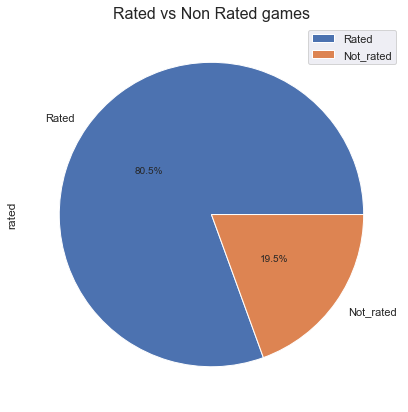

In [59]:
sns.set_color_codes("pastel")
games["rated"].value_counts().plot(kind="pie", figsize=(7,7), autopct="%1.1f%%", pctdistance=0.5)
plt.title("Rated vs Non Rated games",
    fontdict = {'fontsize':16})
plt.legend()

### Outcome of the games

In [60]:
games["victory_status"].value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

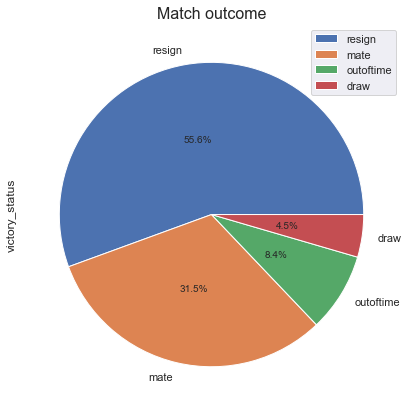

In [61]:
games["victory_status"].value_counts().plot(kind="pie", figsize=(7,7), autopct="%1.1f%%", pctdistance=0.5)
plt.title("Match outcome",
    fontdict = {'fontsize':16})
plt.legend()

### Games won by each color and ties

In [62]:
games["winner"].value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

Text(0.5, 1.0, 'Games won by each color and ties')

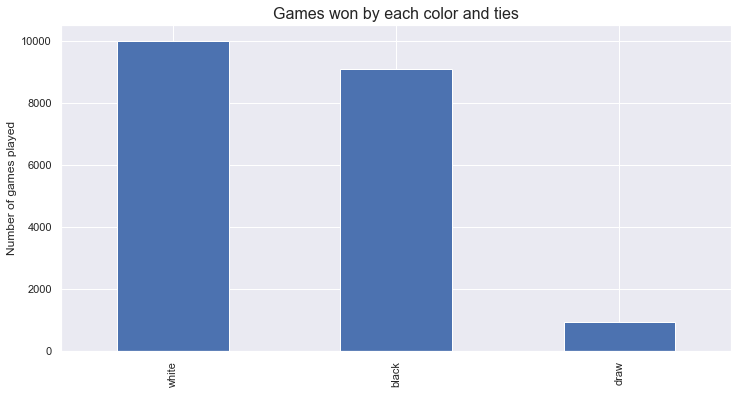

In [63]:
games["winner"].value_counts().plot(kind="bar",figsize=(12,6))
plt.ylabel("Number of games played")
plt.title("Games won by each color and ties",
    fontdict = {'fontsize':16})

### Top 20 Most played openings

In [64]:
games["opening_name"].value_counts().head(20)

Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
Scotch Game                                      271
French Defense: Knight Variation                 271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Caro-Kann Defense                                199
Philidor Defense #3                              198
Philidor Defense #2                              193
Indian Game                                      181
Italian Game: Anti-Fried Liver Defense           180
Four Knights Game: Italian Variation             176
Modern Defense                                   174
Owen Defense                                     168
King's Pawn Game: Wayward Queen Attack        

Text(0.5, 1.0, 'Top 20 Most played openings')

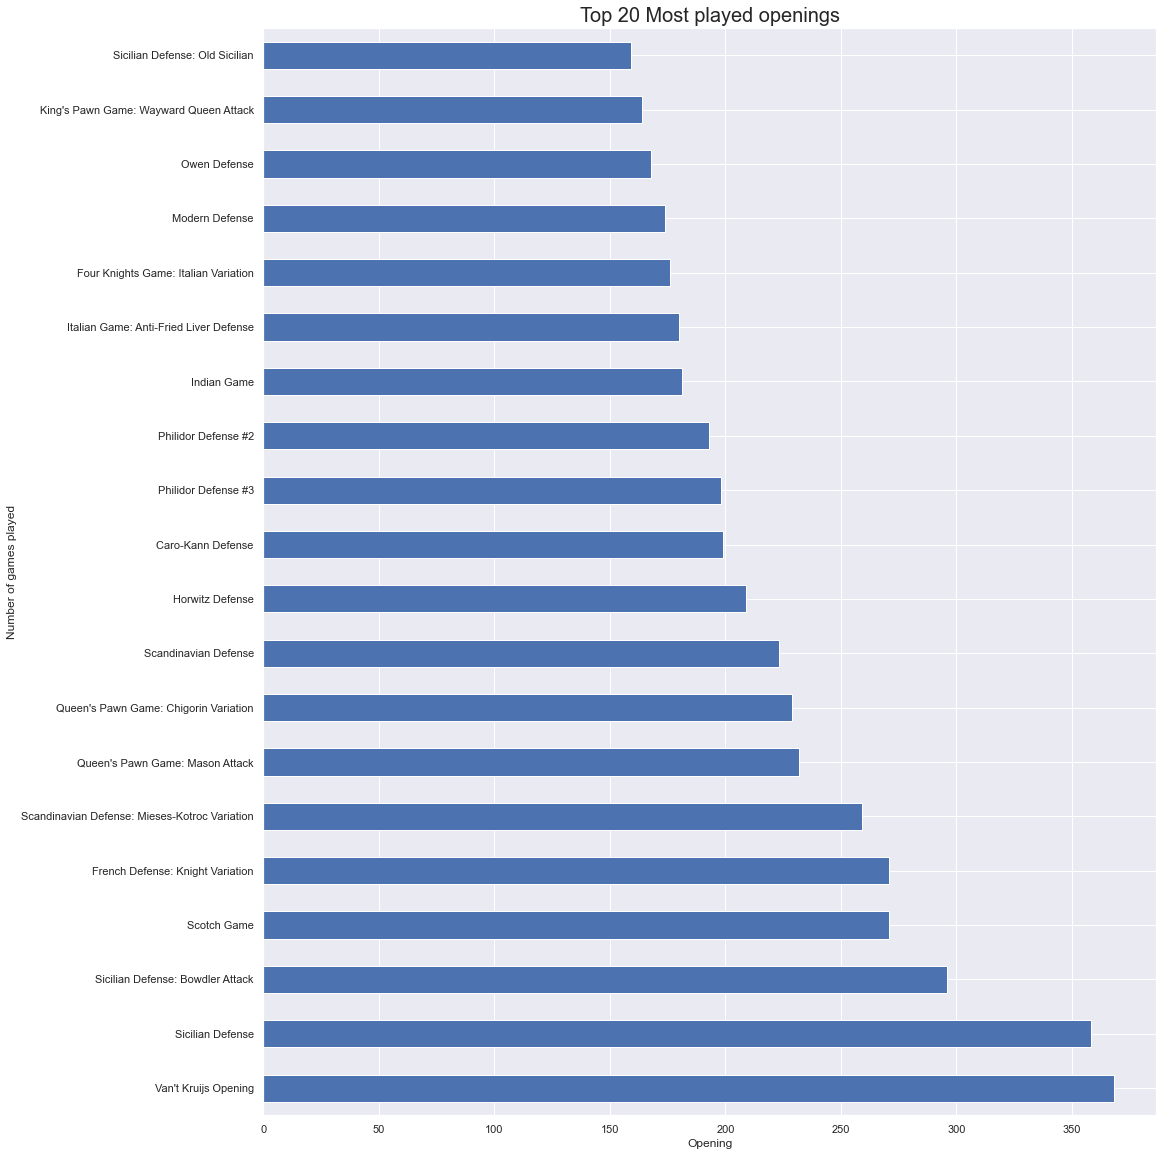

In [65]:
games["opening_name"].value_counts().head(20).plot(kind='barh',figsize=(16,20))
plt.xlabel("Opening")
plt.ylabel("Number of games played")
plt.title("Top 20 Most played openings",
    fontdict = {'fontsize':20})

### Best openings for black and white by count of win for each opening

In [66]:
maskb = games['winner'] == 'black'
best_openings_black = games[maskb]
best_openings_black["opening_name"].value_counts().head(10)

Van't Kruijs Opening                     226
Sicilian Defense                         194
Sicilian Defense: Bowdler Attack         164
Scandinavian Defense                     123
French Defense: Knight Variation         121
Scotch Game                              115
Queen's Pawn Game: Chigorin Variation    109
Queen's Pawn Game: Mason Attack          103
Indian Game                              100
Philidor Defense #2                       96
Name: opening_name, dtype: int64

Text(0.5, 1.0, 'Best openings for black')

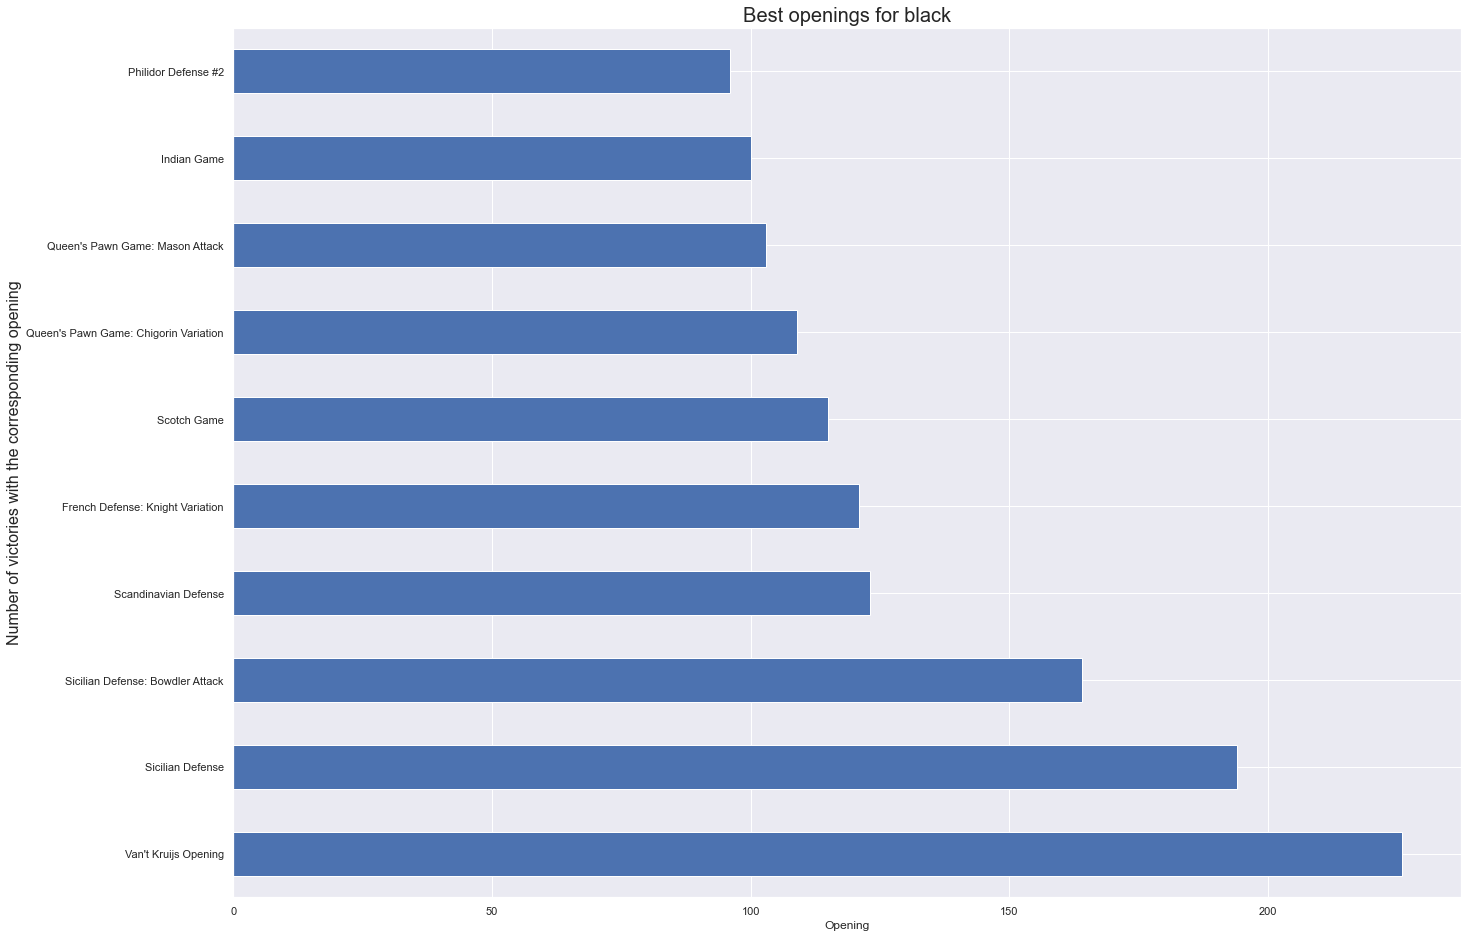

In [67]:
best_openings_black["opening_name"].value_counts().head(10).plot(kind='barh',figsize=(22,16))
plt.xlabel("Opening")
plt.ylabel("Number of victories with the corresponding opening", fontdict = {'fontsize':16})
plt.title("Best openings for black",
    fontdict = {'fontsize':20})

In [68]:
maskw = games['winner'] == 'white'
best_openings_white = games[maskw]
best_openings_white["opening_name"].value_counts().head(10)

Scandinavian Defense: Mieses-Kotroc Variation    164
Sicilian Defense                                 149
Scotch Game                                      145
French Defense: Knight Variation                 135
Philidor Defense #3                              127
Van't Kruijs Opening                             126
Sicilian Defense: Bowdler Attack                 119
Queen's Pawn Game: Mason Attack                  116
Queen's Pawn Game: Chigorin Variation            112
Horwitz Defense                                  110
Name: opening_name, dtype: int64

Text(0.5, 1.0, 'Best openings for white')

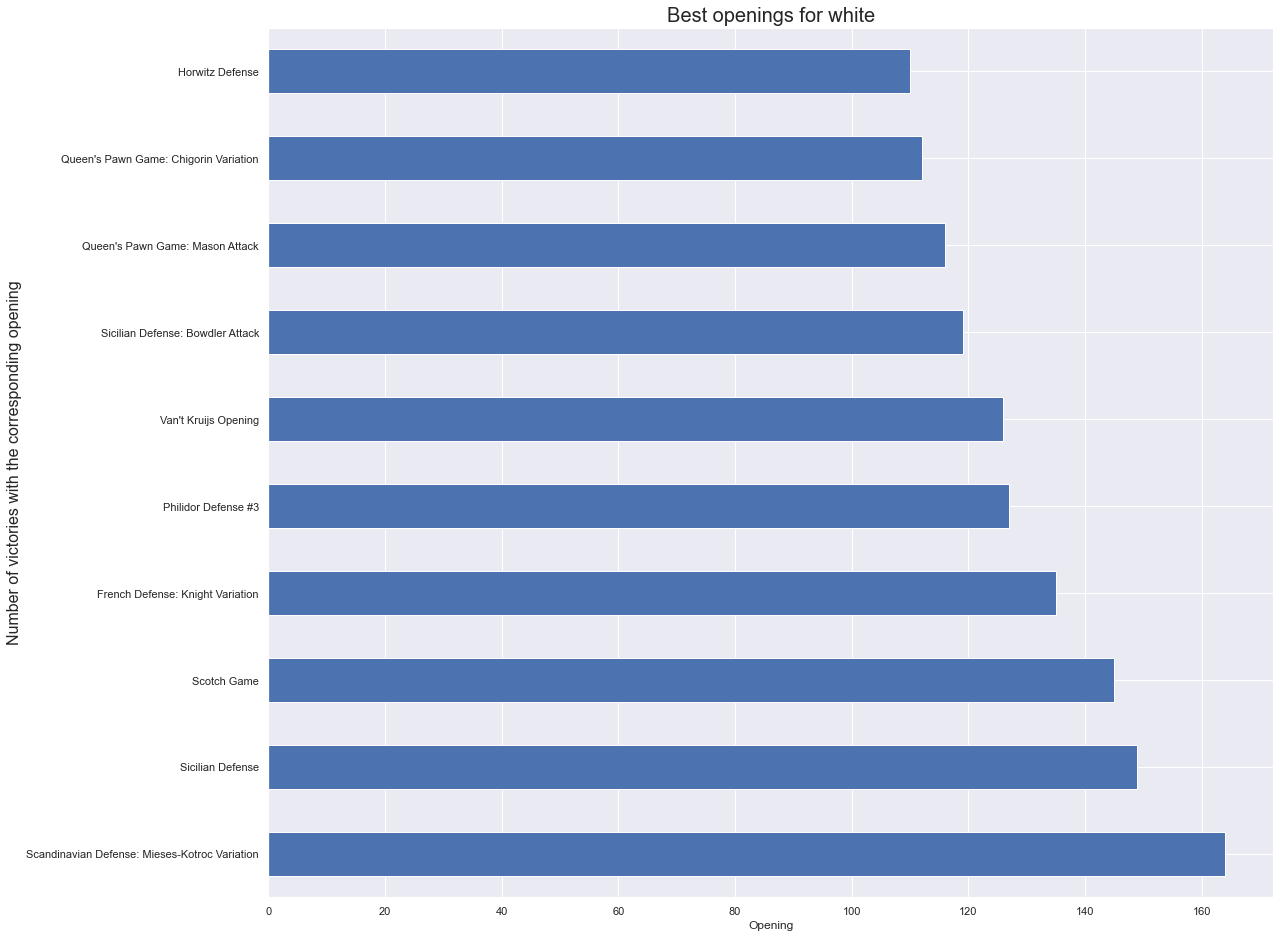

In [69]:
best_openings_white["opening_name"].value_counts().head(10).plot(kind='barh',figsize=(18,16))
plt.xlabel("Opening")
plt.ylabel("Number of victories with the corresponding opening", fontdict = {'fontsize':16})
plt.title("Best openings for white",
    fontdict = {'fontsize':20})

### Analysis of rating by population density

Text(0.5, 1.0, 'Population density by white rating')

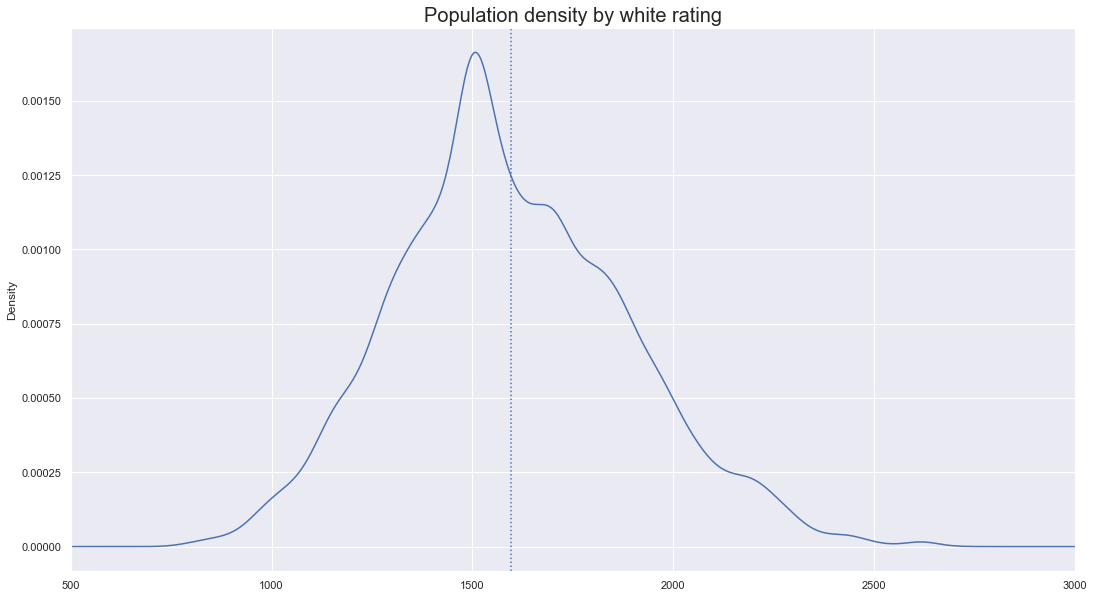

In [70]:
mean_blancas = games["white_rating"].mean()
sns.set(rc={'figure.figsize':(18,10)})
games["white_rating"].plot(kind="kde")
plt.axvline(mean_blancas, linestyle = 'dotted')
plt.xlim(500,3000)
plt.title("Population density by white rating", fontsize= 20)

Text(0.5, 1.0, 'Population density by black rating')

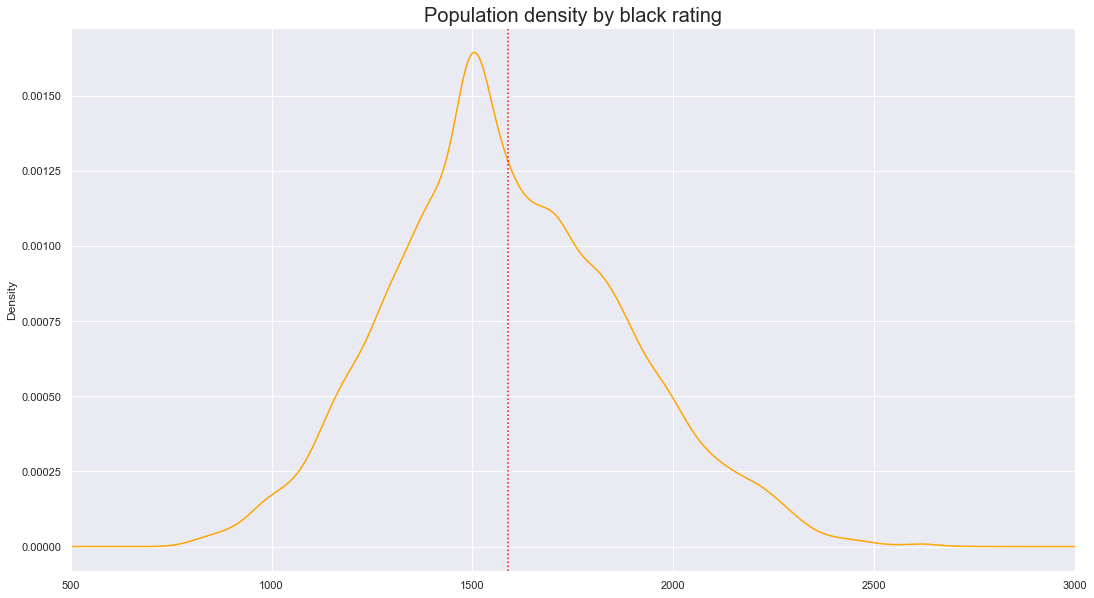

In [71]:
mean_negras = games["black_rating"].mean()
sns.set(rc={'figure.figsize':(18,10)})
games["black_rating"].plot(kind="kde", c="orange")
plt.axvline(mean_negras, linestyle = 'dotted', c="red")
plt.xlim(500,3000)
plt.title("Population density by black rating", fontsize= 20)

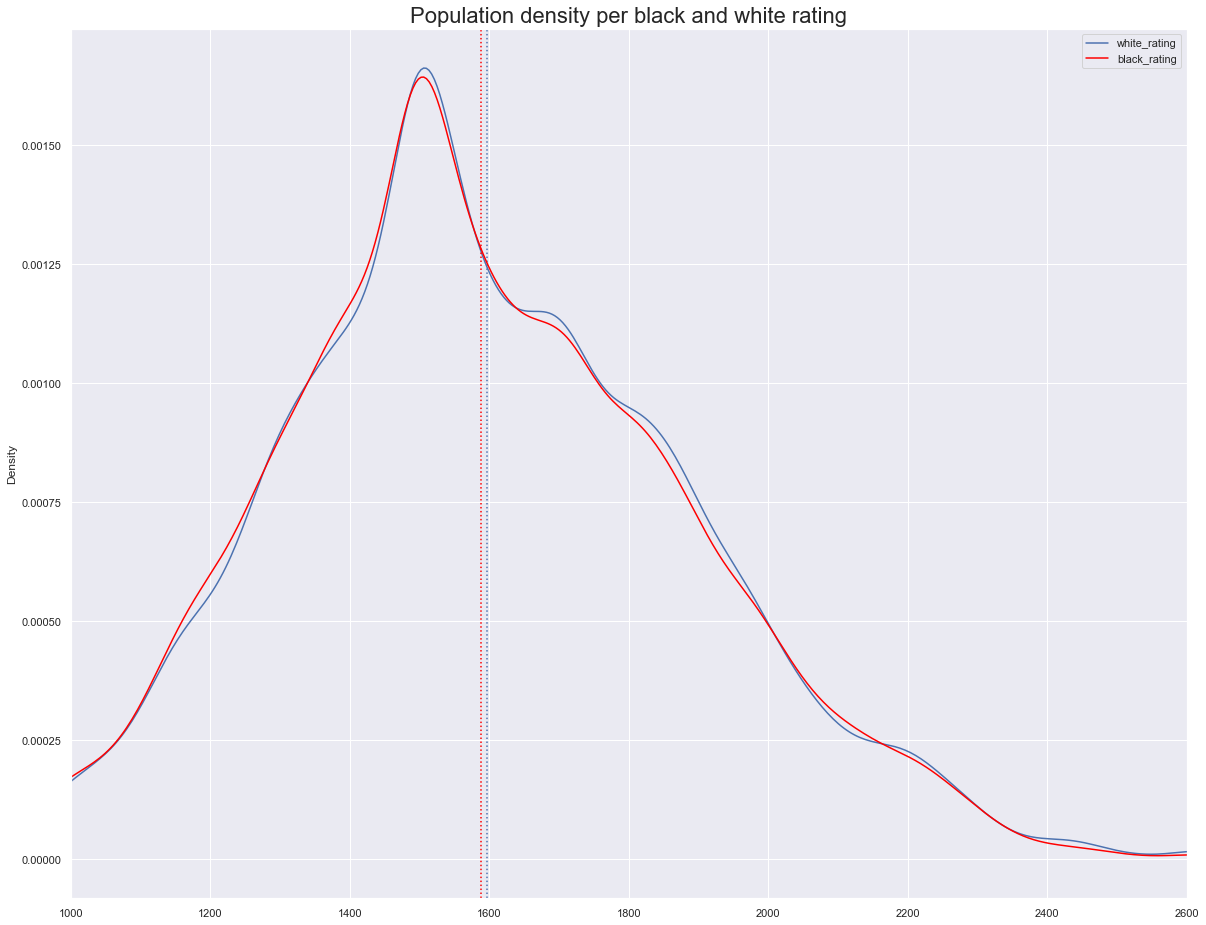

In [72]:
sns.set(rc={'figure.figsize':(20,16)})
games["white_rating"].plot(kind="kde")
plt.axvline(mean_blancas, linestyle = 'dotted')
games["black_rating"].plot(kind="kde", c="red")
plt.axvline(mean_negras, linestyle = 'dotted', c="red")
plt.xlim(1000,2600)
plt.title("Population density per black and white rating", fontsize= 22)
plt.legend()

### Turns data

In [73]:
games["turns"].describe()

count    20058.000000
mean        60.465999
std         33.570585
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

Text(0.5, 0, 'Number of movements')

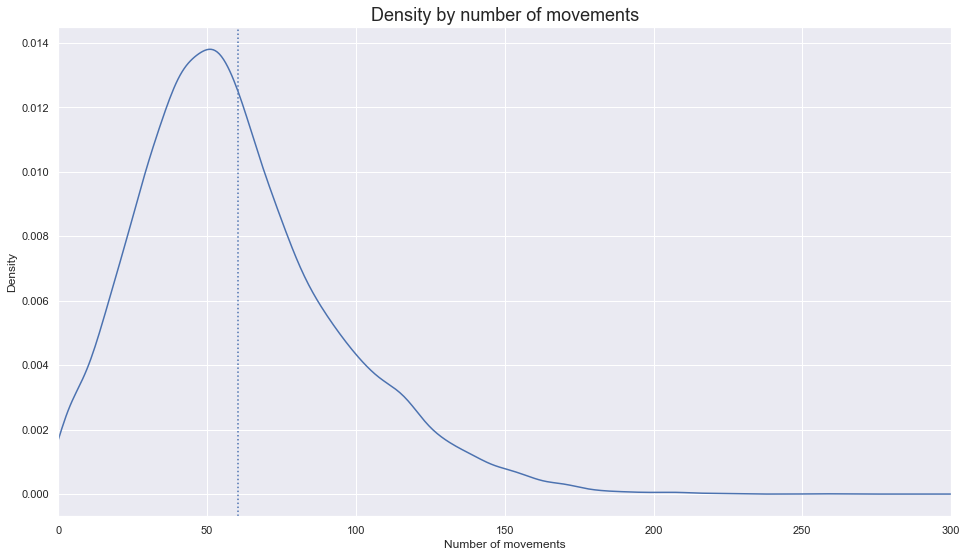

In [74]:
media_movimientos = games["turns"].mean()
sns.set(rc={'figure.figsize':(16,9)})
games["turns"].plot(kind="kde")
plt.axvline(media_movimientos, linestyle = 'dotted')
plt.xlim(0,300)
plt.title("Density by number of movements", fontsize= 18)
plt.xlabel("Number of movements")

### Correlation between movements and rating

In [85]:
games[["turns","white_rating","black_rating"]].corr(method="pearson", min_periods=1)

,turns,white_rating,black_rating
turns,1.000000,0.129753,0.160467
white_rating,0.129753,1.000000,0.634171
black_rating,0.160467,0.634171,1.000000


C:\Users\cabal\AppData\Local\Temp\ipykernel_7832\1164462900.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

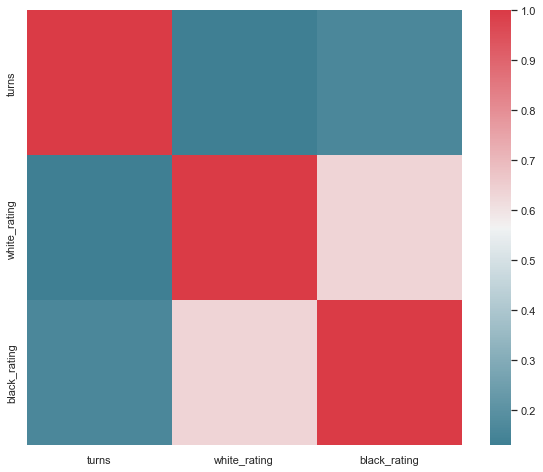

In [97]:
f, ax = plt.subplots(figsize=(10, 8))
corr = games[["turns","white_rating","black_rating"]].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

The correlation coefficient in this case is greater than zero indicates at first glance a positive relationship, but the correlation is not very strong having in count the relation between number of movements and overall rating